In [11]:
import os
import pandas as pd
from PIL import Image

import numpy as np

from src.activation import relu, softmax
from src.cost import softmax_cross_entropy
from src.optimizer import adam

from src.layers.conv import Conv
from src.layers.dense import Dense
from src.layers.pooling import Pool
from src.layers.dropout import Dropout
from src.layers.flatten import Flatten

from src.nn import NeuralNetwork

In [12]:
trainpaths = os.listdir("./data/fingers/train")
testpaths = os.listdir("./data/fingers/test")

train_str = "./data/fingers/train/"
trainpaths = ["./data/fingers/train/" + p for p in trainpaths]

test_str = "./data/fingers/test/"
testpaths = ["./data/fingers/test/" + p for p in testpaths]

df_train = pd.DataFrame(trainpaths, columns=['Filepath'])
df_train['set'] = 'train'
df_test = pd.DataFrame(testpaths, columns=['Filepath'])
df_test['set'] = 'test'

image_df = pd.concat([df_train,df_test])

image_df['Label'] = image_df['Filepath'].apply(lambda x: x[-6])
image_df['Label_LR'] = image_df['Filepath'].apply(lambda x: x[-5])

train_df = image_df[image_df['set'] == 'train']
test_df = image_df[image_df['set'] == 'test']

Y_train = np.array(train_df['Label'])
Y_test = np.array(test_df['Label'])

In [13]:
print(Y_train, Y_test)

['5' '4' '2' ... '4' '4' '2'] ['4' '3' '1' ... '5' '0' '1']


In [14]:
# input_array = np.zeros(shape=(len(train_df),128,128,1))
# for img in range(len(train_df)):
#     img_pil = Image.open(train_df['Filepath'][img])
#     img_arr = np.asarray(img_pil)
#     input_array[img,:,:,0] = img_arr

# np.savez_compressed("./data/fingers/xtrain.npy", input_array, allow_pickle=True)
# np.savez_compressed("./data/fingers/ytrain.npy", Y_train, allow_pickle=True)

In [15]:
x_train = np.asarray([])
y_train = Y_train.astype(np.int32)
x_test  = np.asarray([])
y_test  = Y_test.astype(np.int32)

with np.load("./data/fingers/xtrain.npz") as data:
    x_train = data['arr_0']

with np.load("./data/fingers/xtest.npz") as data:
    x_test = data['arr_0']

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(18000, 128, 128, 1) (18000,) (3600, 128, 128, 1) (3600,)


[5 4 2 ... 4 4 2]


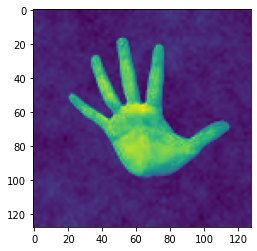

In [16]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0,:,:,0])
print(y_train)

In [17]:
def one_hot(y, num_classes=6):
    y_onehot = np.zeros((y.shape[0], num_classes))
    y_onehot[np.arange(y.shape[0]), y] = 1
    return y_onehot


def preprocess(x_train, y_train, x_test, y_test):
    x_train = x_train.astype(np.float32)
    y_train = y_train.astype(np.int32)
    y_train = one_hot(y_train)
    x_train /= 255.
    x_test /= 255.
    return x_train, y_train, x_test, y_test

In [18]:
x_train, y_train, x_test, y_test = preprocess(x_train, y_train, x_test, y_test)

In [19]:
cnn = NeuralNetwork(
        input_dim=(128,128,1),
        layers=[
            Conv(3, 1, 32, activation=relu),
            Pool(2, 2),
            Dropout(0.25),
            Flatten(),
            Dense(128, activation=relu),
            Dropout(0.1),
            Dense(6, activation=softmax)
            ],
        cost_function=softmax_cross_entropy,
        optimizer=adam
)

cnn.train(x_train=x_train, y_train=y_train,
          batch_size=256,
          num_epochs=10,
          learning_rate=0.001,
          validation_data=(x_test, y_test))

Started training with 10 epochs and batch size 256
Epoch 1
Epoch 1 cost: 0.005942396414599589


AttributeError: 'NeuralNetwork' object has no attribute 'forward'